In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.stats import skew, kurtosis

In [2]:
def extract_features(window):
    features = {}
    features['max'] = np.max(window)
    #features['min'] = np.min(window)  this isnt useful cause the min is set to zero manually 
    features['mean'] = np.mean(window)
    features['std'] = np.std(window)
    features['sum_abs'] = np.sum(np.abs(window))
    features['peak_to_peak'] = np.ptp(window)

    # Number of peaks
    peaks, _ = find_peaks(window, height = 1.01, distance = 2)  # You can set a height threshold
    features['num_peaks'] = len(peaks)

    # Max gradient
    grad = np.gradient(window)
    features['max_grad'] = np.max(np.abs(grad))

    # Skewness and Kurtosis
    features['skewness'] = skew(window)
    features['kurtosis'] = kurtosis(window)

    # Energy (sum of squares)
    features['energy'] = np.sum(window ** 2)

    # First few FFT components
    fft_vals = np.abs(np.fft.fft(window))[:5]
    for i, val in enumerate(fft_vals):
        features[f'fft_{i}'] = val

    return features


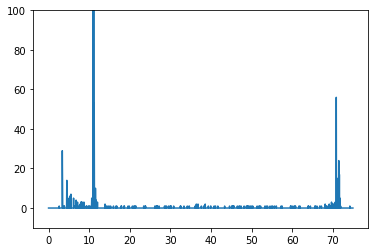

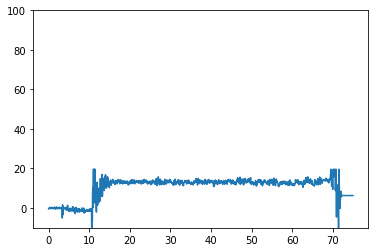

In [3]:
filename = "output_data_ASI3.txt"  
data = np.loadtxt(filename, delimiter=" ")


time = data[:, 0]     
piezo = data[:, 1]
accel_z = data[:,2]

plt.plot(time, piezo)
plt.ylim(-10,100)
plt.show()

plt.plot(time, accel_z)
plt.ylim(-10,100)
plt.show()

In [4]:
threshold = 1.01 
peaks, _ = find_peaks(piezo, height=threshold, distance=2)  


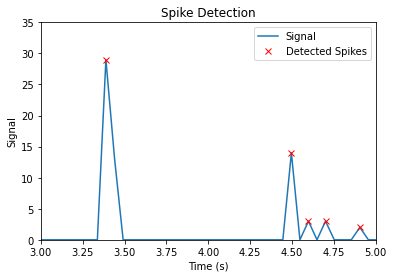

43


In [5]:
piezo[np.abs(piezo) < threshold] = 0 
plt.plot(time, piezo, label='Signal')
plt.plot(time[peaks], piezo[peaks], "rx", label='Detected Spikes')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.legend()
plt.title('Spike Detection')
plt.ylim(0, 35)
plt.xlim(3, 5)
plt.show()


print(len(peaks))

In [6]:
print("Spikes found at times:", time[peaks])
print("These are the spikes:", piezo[peaks])

Spikes found at times: [ 3.388  4.496  4.598  4.7    4.905  5.058  5.211  5.517  6.164  6.776
  7.132  7.801  7.936  8.14   8.242  8.709 10.633 10.989 11.092 11.244
 11.397 11.55  11.737 11.889 12.042 13.912 36.394 36.804 38.582 68.121
 69.125 69.686 69.993 70.095 70.414 70.603 70.857 71.01  71.112 71.264
 71.468 71.621 71.773]
These are the spikes: [ 29.  14.   3.   3.   2.   5.   6.   7.   5.   4.   3.   2.   3.   3.
   3.   3.   5. 991. 158.  53.   7.  10.   4.   2.   3.   2.   2.   2.
   2.   2.   2.   3.   2.   2.   2.   3.  56.  14.  15.   6.  24.  17.
   5.]


In [7]:
window_size = 30


spike_windows = []

for peak in peaks:
    start = max(peak - window_size//2, 0)
    end = min(peak + window_size//2, len(piezo))
    window = piezo[start:end]
    spike_windows.append(window)
    
#print(spike_windows)

vectors = []

for i in range(0, len(spike_windows)):
    stats = extract_features(spike_windows[i])
    vectors.append(stats)


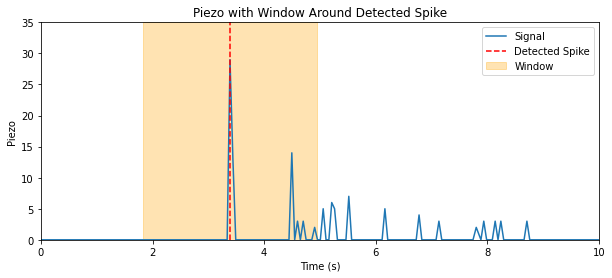

In [8]:
spike_idx = peaks[0] 
window_size = 30

start_idx = max(spike_idx - window_size, 0)
end_idx = min(spike_idx + window_size, len(piezo))


plt.figure(figsize=(10, 4))
plt.plot(time, piezo, label="Signal")
plt.axvline(time[spike_idx], color='r', linestyle='--', label='Detected Spike')

plt.axvspan(time[start_idx], time[end_idx], color='orange', alpha=0.3, label='Window')
plt.legend()
plt.ylim(0, 35)
plt.xlim(0, 10)


plt.title('Piezo with Window Around Detected Spike')
plt.xlabel('Time (s)')
plt.ylabel('Piezo')
plt.show()


#spike_idx = peaks[-1] 
#window_size = 30

#start_idx = max(spike_idx - window_size, 0)
#end_idx = min(spike_idx + window_size, len(piezo))

#plt.figure(figsize=(10, 4))
#plt.plot(time, piezo, label="Signal")
#plt.axvline(time[spike_idx], color='r', linestyle='--', label='Detected Spike')
#plt.axvspan(time[start_idx], time[end_idx], color='orange', alpha=0.3, label='Window')

#plt.legend()
#plt.ylim(0, 35)
#plt.xlim(65, 75)
#plt.title('Piezo with Window Around Detected Spike')
#plt.xlabel('Time (s)')
#plt.ylabel('Piezo')
#plt.show()

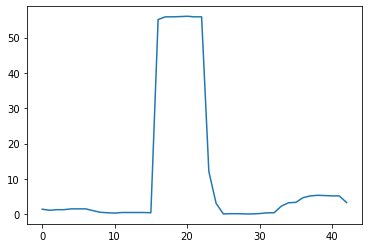

In [9]:
thing_to_plot = []
for i in range(0, len(vectors)):
    
    thing_to_plot.append(vectors[i].get('mean'))   #change the red bit to change the graph
    
plt.plot(thing_to_plot)

In [10]:
labels = ['Ignition', 'Motor Burn','Motor Burn','Motor Burn', 'Motor Burn', 'Motor Burn', 'Motor Burn', 'Motor Burn', 'Motor Burn', 'Motor Burn', 'Motor Burn', 'Motor Burn', 'Motor Burn','Motor Burn', 'Motor Burn', 'Motor Shutoff' , 'Ejection', 'Ejection', 'Ejection', 'Ejection', 'Ejection', 'Start of Descent', 'Start of Descent', 'Start of Descent', 'Start of Descent', 'Descent', 'Descent', 'Descent', 'Descent',  'Descent','Descent','Descent','Descent','Descent','Descent','Descent','Landing', 'Landing', 'Landing', 'Landing', 'Landing', 'Landing', 'Landing']

print(len(vectors))
print(len(labels))


43
43


In [11]:
#Array_dict = [list(event.values()) for event in vectors]

In [12]:
#from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import accuracy_score


#X = [list(event.values()) for event in vectors]  

#X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=90)

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)  
#X_test_scaled = scaler.transform(X_test)      


#knn = KNeighborsClassifier(n_neighbors=3)


#knn.fit(X_train_scaled, y_train)


#predictions = knn.predict(X_test_scaled)


#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy:", accuracy)

In [13]:
#print("Length of X (features):", len(X))
#print("Length of labels:", len(labels))

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler



scores_list = []
for i in range(0, 1): 
    
    X = [list(event.values()) for event in vectors]   
    #print(X)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  

    
    #X_scaled[:, 8] *= 1
    X_scaled[:, 12] *= 10
    
    
    knn = KNeighborsClassifier(n_neighbors= 6, weights='distance')

    cv = StratifiedKFold(n_splits=12)  
    
    predicted_labels = cross_val_predict(knn, X_scaled, labels, cv=cv)

    for idx in range(len(predicted_labels)):
        print(f"Sample {idx}: Predicted Label = {predicted_labels[idx]}, Actual Label = {labels[idx]}")


    scores = cross_val_score(knn, X_scaled, labels, cv=cv)
    print("Cross-validation accuracy:", scores.mean())
    
    
    #scores_list.append(scores.mean())

#print("Cross-validation accuracy:", scores.mean())

#print(scores_list)

Sample 0: Predicted Label = Descent, Actual Label = Ignition
Sample 1: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 2: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 3: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 4: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 5: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 6: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 7: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 8: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 9: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 10: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 11: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 12: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 13: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 14: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 15:

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=12.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=12.
  warnings.warn(


In [14]:
vectors.append({'max': 23.736480665051886, 'mean': 1.2227725315911495, 'std': 4.612843190419735, 'sum_abs': 36.68317594773448, 'peak_to_peak': 23.736480665051886, 'num_peaks': 1, 'max_grad': 11.868240332525943, 'skewness': 4.149374701183344, 'kurtosis': 16.51648157644728, 'energy': 683.2048489024667, 'fft_0': 36.68317594773448, 'fft_1': 15.672295109926036, 'fft_2': 35.73083464789107, 'fft_3': 18.510634628714154, 'fft_4': 33.00703975899014})
labels = ['Ignition', 'Motor Burn','Motor Burn','Motor Burn', 'Motor Burn', 'Motor Burn', 'Motor Burn', 'Motor Burn', 'Motor Burn', 'Motor Burn', 'Motor Burn', 'Motor Burn', 'Motor Burn','Motor Burn', 'Motor Burn', 'Motor Shutoff' , 'Ejection', 'Ejection', 'Ejection', 'Ejection', 'Ejection', 'Start of Descent', 'Start of Descent', 'Start of Descent', 'Start of Descent', 'Descent', 'Descent', 'Descent', 'Descent',  'Descent','Descent','Descent','Descent','Descent','Descent','Descent','Landing', 'Landing', 'Landing', 'Landing', 'Landing', 'Landing', 'Landing', 'Ignition']

In [15]:
print(len(vectors))
print(len(labels))

44
44


In [16]:

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler


scores_list = []
for i in range(0, 1): 
    
    X = [list(event.values()) for event in vectors]   
    #print(X)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  

    
    #X_scaled[:, 8] *= 1.5
    X_scaled[:, 12] *= 8
    
    
    knn = KNeighborsClassifier(n_neighbors= 5, weights='distance')

    cv = StratifiedKFold(n_splits=14)  
    
    predicted_labels = cross_val_predict(knn, X_scaled, labels, cv=cv)

    for idx in range(len(predicted_labels)):
        print(f"Sample {idx}: Predicted Label = {predicted_labels[idx]}, Actual Label = {labels[idx]}")


    scores = cross_val_score(knn, X_scaled, labels, cv=cv)
    print("Cross-validation accuracy:", scores.mean())
    
    
    #scores_list.append(scores.mean())

#print("Cross-validation accuracy:", scores.mean())

#print(scores_list)

Sample 0: Predicted Label = Ignition, Actual Label = Ignition
Sample 1: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 2: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 3: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 4: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 5: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 6: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 7: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 8: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 9: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 10: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 11: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 12: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 13: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 14: Predicted Label = Motor Burn, Actual Label = Motor Burn
Sample 15

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=14.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=14.
  warnings.warn(
